In [1]:
import dhlab.nbtext as nb
import dhlab.token_map as tm
import json
import re
%matplotlib inline

In [2]:
first_names = json.load(open("NER-gazetter/first_names.json"))
last_names = json.load(open("NER-gazetter/last_names.json"))
full_names = json.load(open("NER-gazetter/name_structure.json"))
male_names = json.load(open("NER-gazetter/male_names.json"))
female_names = json.load(open("NER-gazetter/female_names.json"))

In [3]:
mf = list(set(male_names) & set(female_names))

In [4]:
specials = [x for x in first_names if '.' in x and x[:-1] in first_names]

In [5]:
specials

['Ilse.',
 'Ragnhild.',
 'Line.',
 'Ragnar.',
 'Ed.',
 'Evgenij.',
 'Ingeborg.',
 'Halvor.',
 'Anne-Ruth.',
 'Dean.',
 'Arnfinn.',
 'Christopher.',
 'Audun.',
 'Ebbe.',
 'Mary.',
 'B.M..',
 'Milena.',
 'Katie.',
 'Ulla.',
 'Leonardo.',
 'K..',
 'Annie.',
 'Kate.',
 'Pierre-Dominique.',
 'Toril.',
 'Konrad.',
 'Asbjørn.',
 'Pål.',
 'F.W..',
 'Simonetta.',
 'Michel.',
 'Flavius.',
 'Hermann.',
 'Jo.',
 'Torsten.',
 'Jolan.',
 'Vilh..',
 'Nik.',
 'Ørjan.',
 'Mirjam.',
 'Jac.',
 'Ivar.',
 'Linda.',
 'Helge.',
 'Pauline.',
 'Deborah.',
 'Frants.',
 'Saul.',
 'Ruth.',
 'Hermod.',
 'Bjarne.',
 'Wenche.',
 'Michael.',
 'Stephan.',
 'Brian.',
 'Kai.',
 'Hj..',
 'Anthony.',
 'Marie-Anne.',
 'Ron.',
 'A.J..',
 'Inger.',
 'Philippe.',
 'Sigvart.',
 'Conrad.',
 'Klaus.',
 'Vegard.',
 'A..',
 'Nic.',
 'Isabel.',
 'Lisbeth.',
 'Anne-Berit.',
 'Marina.',
 'Morten.',
 'Philipp.',
 'Erica.',
 'Cindy.',
 'Sigrid.',
 'Andrea.',
 'Iris.',
 'Fernando.',
 'Aage.',
 'Rolf.',
 'Ingalill.',
 'Fred..',
 'Korky.'

In [6]:
urns = nb.book_urn(author='bjørneboe%')

In [20]:
book = nb.pure_urn(urns)[0]

In [21]:
n = nb.names(book)

In [22]:
tm.show_names(n)

Lag 1

    Den - 17
    Gate - 7
    Store - 7
    Smerters - 6
    By - 5
    Herman - 5
    Klasse - 5
    Tusen - 5
    Gud - 4
    Brønn - 3
    Hus - 3
    Mester - 3
    Plass - 3
    Roma - 3
    Smertes - 3
    Torv - 3

Lag 2

    Tusen Smerters - 5
    Smerters By - 5
    Den Store - 4
    Smerters Hus - 1
    Store Smertes - 1
    Smertes Plass - 1
    Smertes Torv - 1

Lag 3

    Tusen Smerters By - 5
    Den Store Smertes - 1
    Store Smertes Plass - 1

Lag 4

    Den Store Smertes Plass - 1



In [23]:
names = [(x[0][0]) for x in tm.token_map(n, strings=False) if x[0][0] in first_names or x[0][0] in last_names]

In [24]:
tm.names_to_token_map_file(n, 'test.xls')

filen test.xls eksisterer - prøve et nytt filnavn


In [25]:
rtm = tm.read_token_map_file('test.xls')

In [26]:
rtm

[(('By',), ('Tusen', 'Smerters', 'By')),
 (('Smerters',), ('Tusen', 'Smerters', 'By')),
 (('Tusen',), ('Tusen', 'Smerters', 'By')),
 (('Tusen', 'Smerters'), ('Tusen', 'Smerters', 'By')),
 (('Smerters', 'By'), ('Tusen', 'Smerters', 'By')),
 (('Tusen', 'Smerters', 'By'), ('Tusen', 'Smerters', 'By')),
 (('Den',), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Plass',), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Smertes',), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Store',), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Den', 'Store'), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Store', 'Smertes'), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Smertes', 'Plass'), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Den', 'Store', 'Smertes'), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Store', 'Smertes', 'Plass'), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Den', 'Store', 'Smertes', 'Plass'), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Gate',), ('Gate',)),
 (('Gud',), ('Gud',)),
 (('Herman',), ('Herman',)),
 (('H

In [35]:
tm.token_map??

In [36]:
names

['Brønn', 'By', 'Herman', 'Hus', 'Plass', 'Store', 'Store', 'Store']

In [32]:
tm.character_network(book, tm.token_map(names))

TypeError: can only concatenate list (not "str") to list

In [38]:
navn = nb.names(book)

In [39]:
tm.token_map(navn)

[(('Brønn',), ('Brønn',)),
 (('By',), ('Tusen', 'Smerters', 'By')),
 (('Den',), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Gate',), ('Gate',)),
 (('Gud',), ('Gud',)),
 (('Herman',), ('Herman',)),
 (('Hus',), ('Smerters', 'Hus')),
 (('Klasse',), ('Klasse',)),
 (('Mester',), ('Mester',)),
 (('Plass',), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Roma',), ('Roma',)),
 (('Smerters',), ('Tusen', 'Smerters', 'By')),
 (('Smertes',), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Store',), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Torv',), ('Smertes', 'Torv')),
 (('Tusen',), ('Tusen', 'Smerters', 'By')),
 (('Tusen', 'Smerters'), ('Tusen', 'Smerters', 'By')),
 (('Smerters', 'By'), ('Tusen', 'Smerters', 'By')),
 (('Smerters', 'Hus'), ('Smerters', 'Hus')),
 (('Den', 'Store'), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Store', 'Smertes'), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Smertes', 'Plass'), ('Den', 'Store', 'Smertes', 'Plass')),
 (('Smertes', 'Torv'), ('Smertes', 'Torv')),
 (('Tusen', 'Smert

In [44]:
N = tm.character_network(book, tm.token_map(navn))

In [45]:
import dhlab.graph_networkx_louvain as gnl

C:\Users\larsj\AppData\Local\Continuum\anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


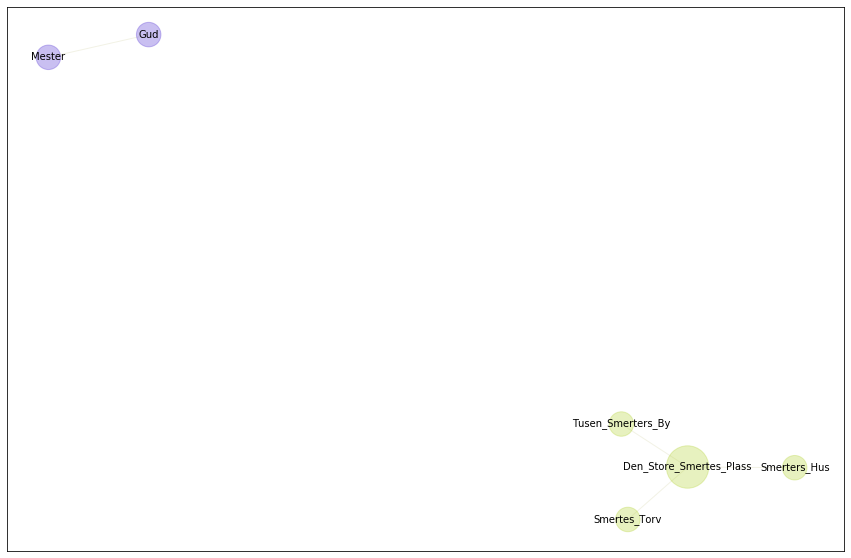

In [46]:
gnl.show_graph(N)

In [47]:
!pip install multiprocess

  Created wheel for multiprocess: filename=multiprocess-0.70.9-cp37-none-any.whl size=108035 sha256=bfdd2d5f85255e6789eb0a02c1373e0ff1aed53776dbfbc2f350288113dff6b4
  Stored in directory: C:\Users\larsj\AppData\Local\pip\Cache\wheels\96\20\ac\9f1d164f7d81787cd6f4401b1d05212807d021fbbbcc301b82
  Created wheel for dill: filename=dill-0.3.1.1-cp37-none-any.whl size=78598 sha256=7e992180ad709576b4df425c550bd86ca71e2481413d8c2b6ad967b4b3fb8a76
  Stored in directory: C:\Users\larsj\AppData\Local\pip\Cache\wheels\59\b1\91\f02e76c732915c4015ab4010f3015469866c1eb9b14058d8e7
Successfully built multiprocess dill


You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [54]:
pool.close()

In [65]:

urns = nb.book_urn(author='hams%', limit = 300)
l = len(urns)
ranges = range(0, l, int(l/poolnum))
for i in ranges:
    print(i)

0
75
150
225


In [73]:
def urn_concordance(urns = None, word = None, size = 5, before = None, after = None ):
    """ Find a concordance within a corpus as list of URNs. This is a wrapper for get_urnkonk """
    
    # exit if list of urns is empty
    if urns is None or word is None:
        return []
    
    # The URNs may be presented in different ways. 
    urns = pure_urn(urns)
    
    # find values and feed everything to get_urnkonk
    frame = inspect.currentframe()
    args, _, _, values = inspect.getargvalues(frame)
    query = {i:values[i] for i in args if values[i] != None and i != 'word'}
    return get_urnkonk(word, query)

def get_urnkonk(word, params=None, html=True):
    if params is None:
        params = {}

    para = params
    para['word']= word
    try:
        para['urns'] = pure_urn(para['urns'])
    except:
        print('Parameter urns missing')
    r = requests.post('https://api.nb.no/ngram/urnkonk', json = para)
    if html:
        rows = ""
        for x in r.json():
            rows += """<tr>
                <td>
                    <a href='{urn}?searchText={kw}' target='_blank' style='text-decoration:none'>{urnredux}</a>
                </td>
                <td>{b}</td>
                <td>{w}</td>
                <td style='text-align:left'>{a}</td>
            </tr>\n""".format(kw=word,
                              urn=x['urn'],
                              urnredux="{t}, {f}, {y}".format(t=x['title'], f=x['author'], y=x['year']),
                              b=x['before'],
                              w=x['word'],
                              a=x['after']
                             )
        res = """<table>{rows}</table>""".format(rows=rows)
        res = HTML(res)
    else:
        res = pd.DataFrame(r.json())
        res = res[['urn','before','word','after']]
        #r = r.style.set_properties(subset=['after'],**{'text-align':'left'})
    return res

In [70]:
nb.get_urnkonk??

In [74]:
from multiprocess import Pool
import psutil
import time

urns = nb.book_urn(author='hams%', limit = 300)
l = len(urns)

poolnum = psutil.cpu_count(logical =False)
print(poolnum)
step = int(l/poolnum)
pool = Pool(poolnum)
a = pool.map(lambda x: urn_concordance('krig', urns= urns[x:x+step]), range(0, l, step))

pool.close()

4


NameError: name 'urn_concordance' is not defined

In [60]:
sum(a)

4324